### Import Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pca import pca
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read csv file (preprocessed data)
data = pd.read_csv("customer_final_dat.csv", header=0)

In [3]:
data.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmp6,Days_Customer,Age,Total_Spent,Total_NumPurchase,Total_Offers
0,5524,Bachelor,Single,58138.0,0,0,58,635,88,546,...,0,0,0,0,1,663,66,1617,25,1
1,2174,Bachelor,Single,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,113,69,27,6,0
2,4141,Bachelor,Partner,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,312,58,776,21,0
3,6182,Bachelor,Partner,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,139,39,53,8,0
4,5324,PhD,Married,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,161,42,422,19,0


### Scaling Features

In [4]:
# Label enconding categorical variables
data = data.drop(["ID"], axis=1)
df = data.copy() # making a copy dataset to work on 
categorical_col=data.select_dtypes(include='object').columns.tolist() # Education and Marital_Status

LE=LabelEncoder()
for i in categorical_col:
    df[i]=data[[i]].apply(LE.fit_transform)

In [5]:
scaler = StandardScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df),columns= df.columns )

In [6]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmp6,Days_Customer,Age,Total_Spent,Total_NumPurchase,Total_Offers
0,-0.855791,1.269031,0.236068,-0.825388,-0.930227,0.307272,0.983671,1.554623,1.680253,2.461700,...,-0.279414,-0.262299,-0.11659,-0.09498,2.386966,1.530038,1.017296,1.680649,1.319785,0.620785
1,-0.855791,1.269031,-0.234982,1.032151,0.906417,-0.383584,-0.870717,-0.636422,-0.713250,-0.650275,...,-0.279414,-0.262299,-0.11659,-0.09498,-0.418942,-1.191484,1.273722,-0.961838,-1.155824,-0.501847
2,-0.855791,0.297829,0.774257,-0.825388,-0.930227,-0.798098,0.362570,0.572430,-0.176928,1.345050,...,-0.279414,-0.262299,-0.11659,-0.09498,-0.418942,-0.206788,0.333495,0.282956,0.798604,-0.501847
3,-0.855791,0.297829,-1.021717,1.032151,-0.930227,-0.798098,-0.870717,-0.560868,-0.651196,-0.503829,...,-0.279414,-0.262299,-0.11659,-0.09498,-0.418942,-1.062830,-1.290534,-0.918627,-0.895234,-0.501847
4,1.628835,-0.673372,0.242259,1.032151,-0.930227,1.550812,-0.389289,0.421324,-0.216820,0.155177,...,-0.279414,-0.262299,-0.11659,-0.09498,-0.418942,-0.953970,-1.034108,-0.305371,0.538014,-0.501847


### Dimensionality Reduction

Since there are 30 features in the dataset, there may be redudant features, and larger number of features makes the model less interpretable. Therefore, I'll perform dimensionality reduction to remove redudancy while preserving key information. Here, I selected PCA to capture the most defining features and patterns in the dataset.

In [7]:
pca = PCA(n_components=3)
pca_array = pca.fit_transform(df)
pca_df = pd.DataFrame(pca_array, columns=(["col1","col2", "col3"]))
pca_df.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2237.0,-1.079949e-16,2.885563,-4.740976,-2.668698,-0.656510,2.308413,9.125477
col2,2237.0,-1.365818e-16,1.632692,-3.593573,-1.112270,-0.058080,0.618499,8.939291
col3,2237.0,6.352640e-17,1.522860,-3.983305,-1.042308,-0.205273,0.966641,6.073220


[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [29] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.


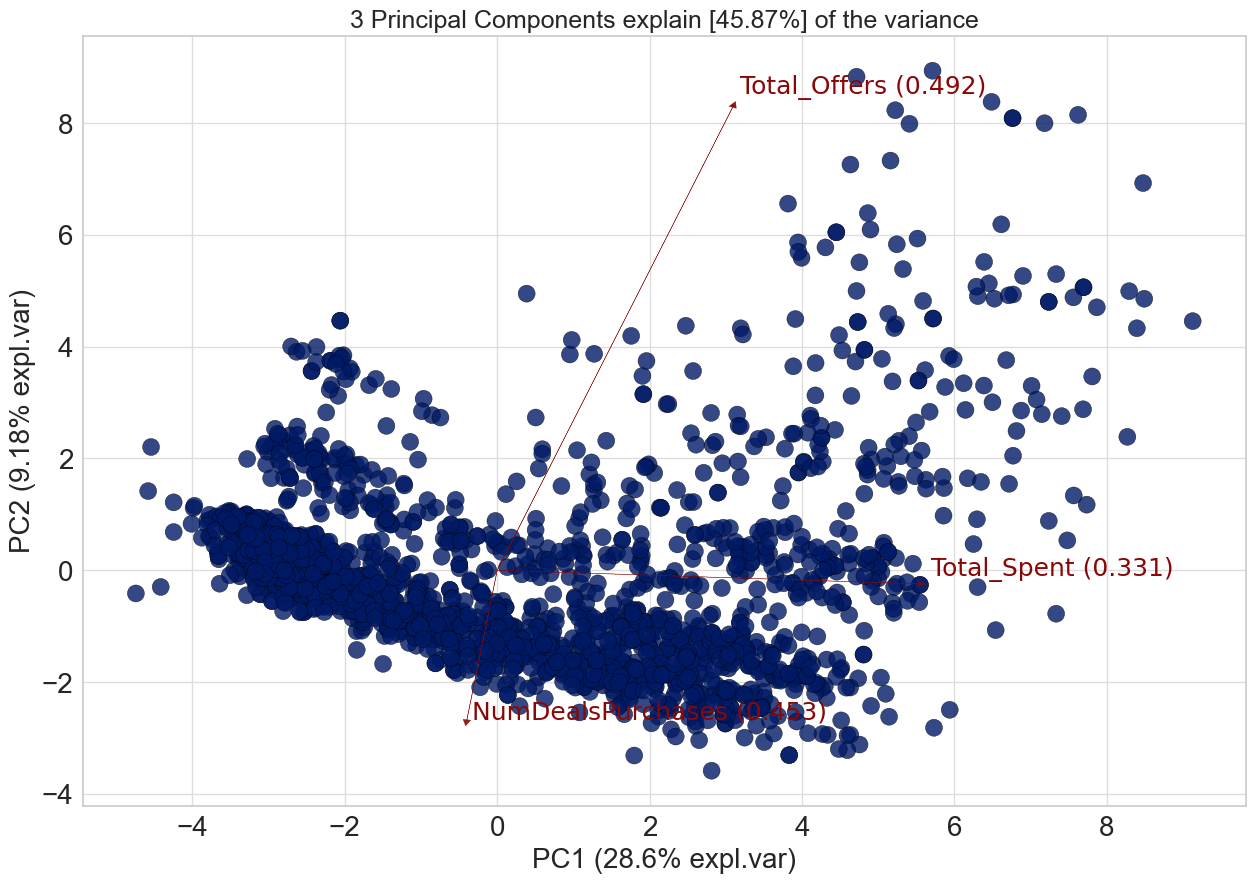

In [10]:
model = pca(n_components=3)
results = model.fit_transform(df)
fig, ax = model.biplot(n_feat=3, figsize = (15,10), legend=False)

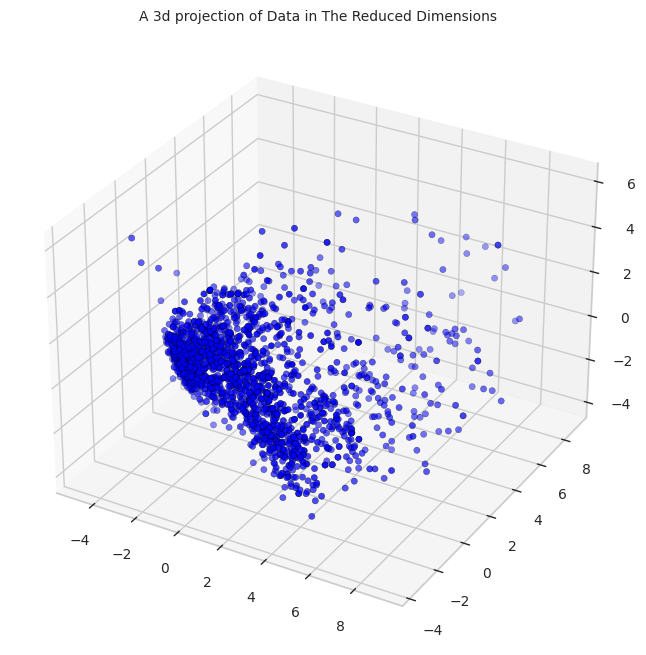

In [11]:
# 3d projection of data in the reduced dimensions
a=pca_df['col1']
b=pca_df['col2']
c=pca_df['col3']

fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(a,b,c, c='blue', marker='o', edgecolor='black')
ax.set_title('A 3d projection of Data in The Reduced Dimensions', size=10)
plt.show()

### K-Means Clustering

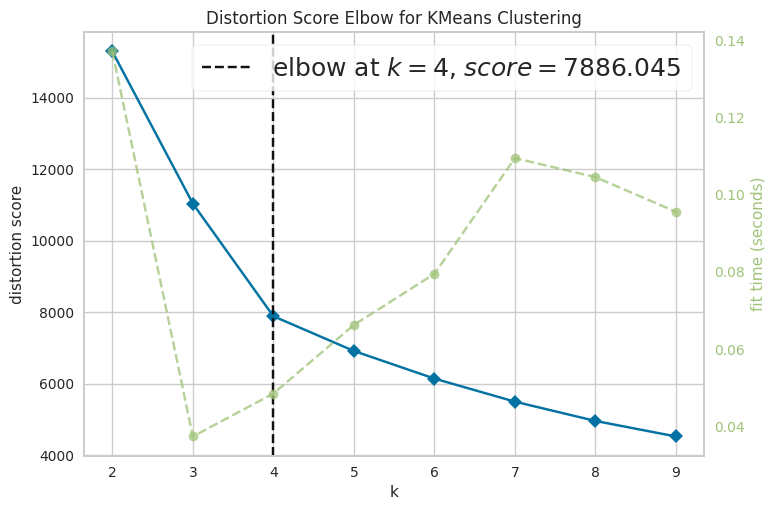

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
# Elbow method to find the optimal number of clusters
model = KMeans()

visualizer = KElbowVisualizer(model, k=(2,10), timings= True)
visualizer.fit(pca_df)       
visualizer.show() 

From the above elbow plot, one can see that the elbow is at k=4 when plotted against distortion score (sum of squared distances from each point to assigned center). The distortion score starts to decline when clusters is set to 4.

In [13]:
kmeans = KMeans(n_clusters=4,random_state=10,init='k-means++')
kmeans_labels = kmeans.fit_predict(pca_df) # fit k-means clustering model

centroids = kmeans.cluster_centers_ # get cluster centroids


pd.Series(kmeans_labels).value_counts() # number of data points in each cluster 

0    1028
3     556
1     479
2     174
dtype: int64

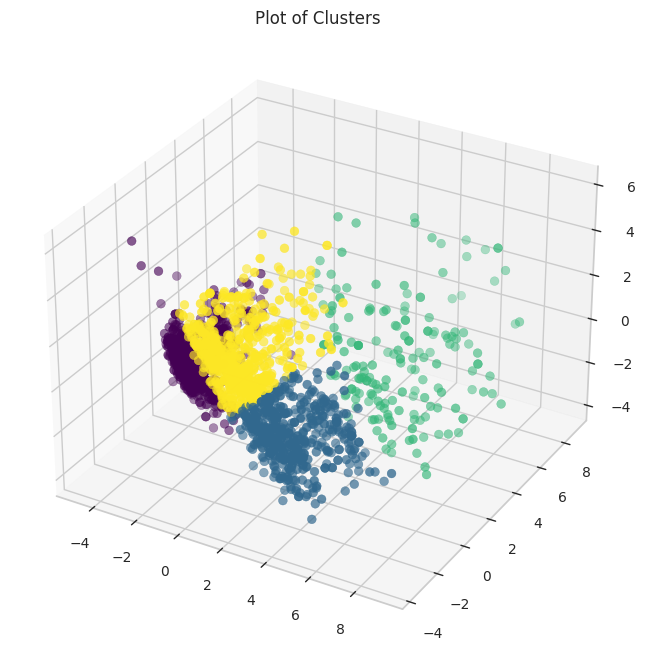

In [14]:
pca_df["Clusters"] = kmeans_labels
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(pca_df["col1"], pca_df["col2"], pca_df["col3"], s=40, c=pca_df["Clusters"], marker='o', cmap='viridis')
ax.set_title("Plot of Clusters")
plt.show()

### Finding Patterns in Clusters

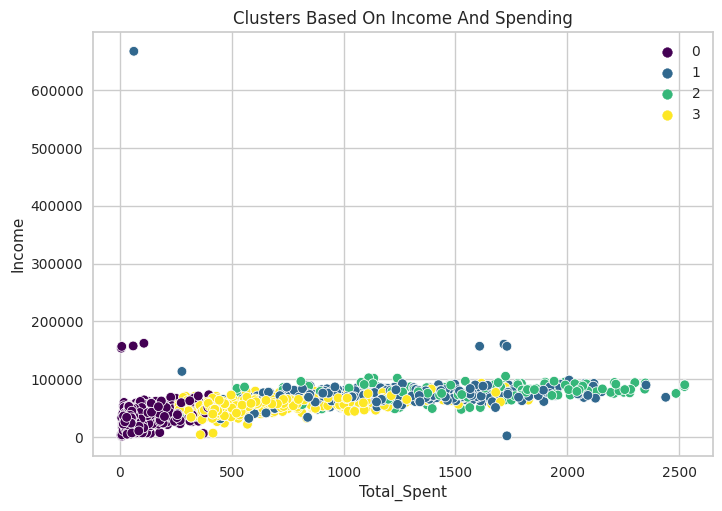

In [16]:
data["Clusters"] = kmeans_labels
pl = sns.scatterplot(data = data,x=data["Total_Spent"], y=data["Income"],hue=data["Clusters"], palette='viridis')
pl.set_title("Clusters Based On Income And Spending")
plt.legend()
plt.show()

From the above plot of 'Income' vs. Total_Spent', one can notice how different clusters spread across income and spending values. Cluster 0 is a group of individuals who have lower income and spend less. Cluster 1 is a group with average income and high spending, Cluster 2 with high income and high spending, and Cluster 3 with average income and average spending.

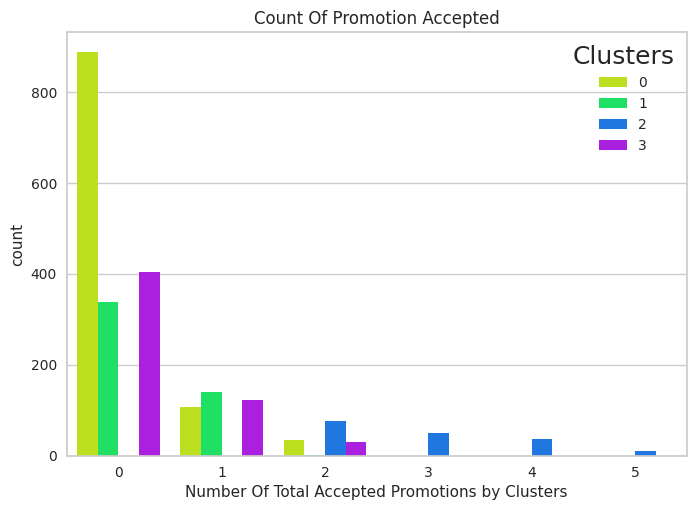

In [17]:
plt.figure()
pl = sns.countplot(x=data["Total_Offers"],hue=data["Clusters"], palette="hsv")
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions by Clusters")
plt.show()

The above plot of number of total accepted promotions by clusters shows that overall Cluster 0 has accepted promotions the least. Clusters 1 and 3 seem to have similar patterns of accepting promotions, with number of total accepted ranging from 0 to 2. On the other hand, Cluster 2 has accepted the larger number of promotions but with less frequency - only a few people in Cluster 2 has accepted many promotions.

Such observations resonate with the patterns found from above Income vs. Total_Spent plot. Cluster 0, with lower income and lower spending, tends to not accept any promotions - this notion is intuitive in that people who spend less will not be interested in any promotions. Cluster 2 in is in the higher income and spending group, which correlates to the pattern of accepting more promotions. Cluster 1 and 3 are in the middle tier, thus explaining their respective behavior of accepting promotions.

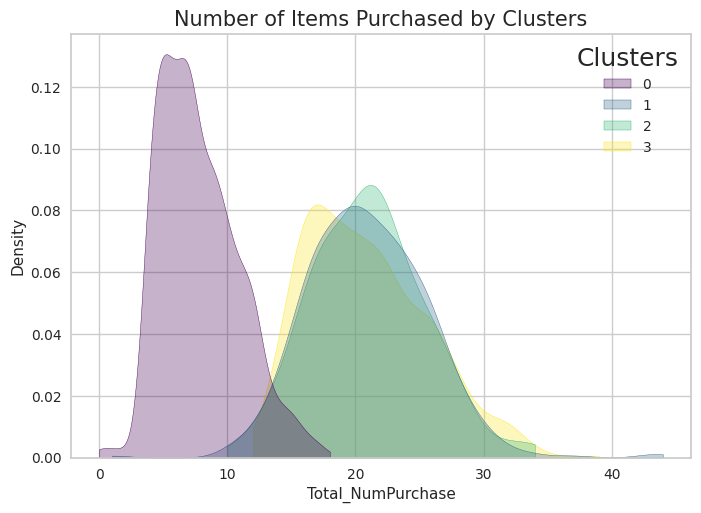

In [18]:
sns.kdeplot(x=data["Total_NumPurchase"], hue=data["Clusters"], cut=0, fill=True, common_norm=False, alpha=0.3, palette="viridis")
plt.title("Number of Items Purchased by Clusters", size=15)
plt.show()

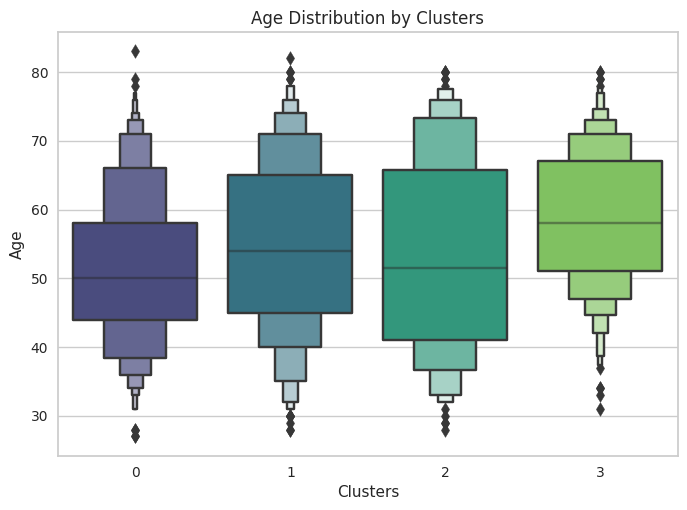

In [19]:
plt.figure()
pl=sns.boxenplot(y=data["Age"],x=data["Clusters"], palette="viridis")
pl.set_title("Age Distribution by Clusters")
plt.show()

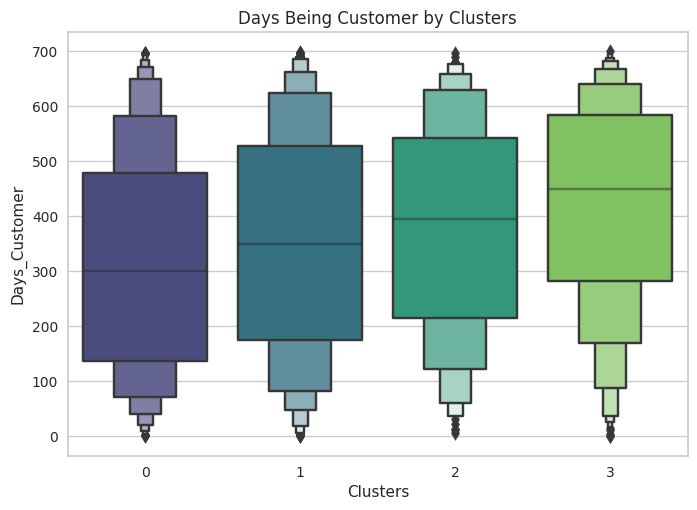

In [20]:
plt.figure()
pl=sns.boxenplot(y=data["Days_Customer"],x=data["Clusters"], palette="viridis")
pl.set_title("Days Being Customer by Clusters")
plt.show()

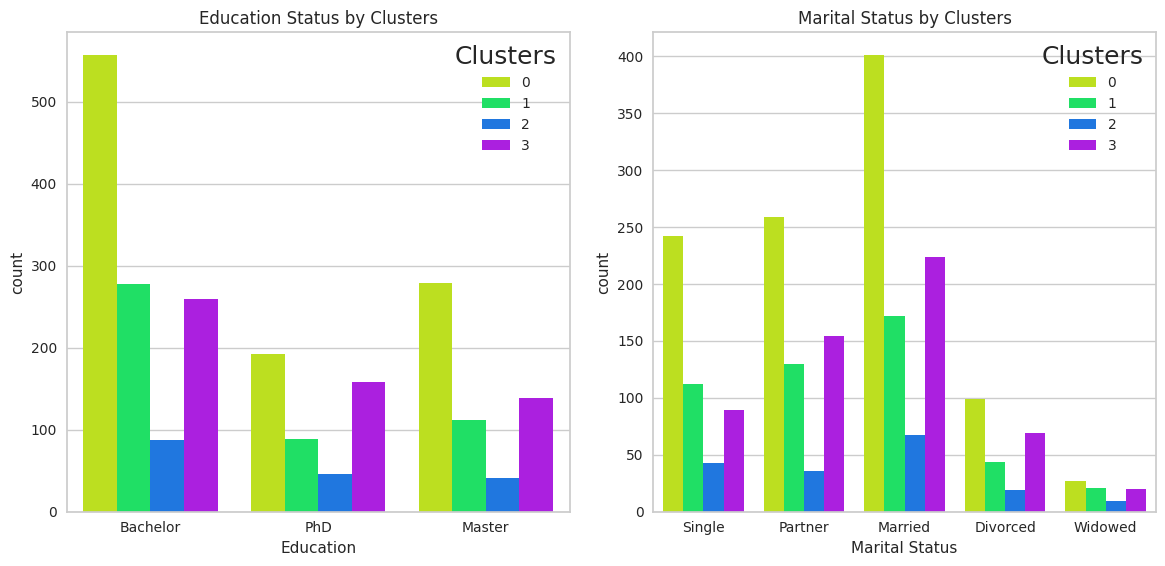

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

ax1 = axes[0]
sns.countplot(x=data["Education"], hue=data["Clusters"], palette="hsv", ax=ax1)
ax1.set_title("Education Status by Clusters")
ax1.set_xlabel("Education")

ax2 = axes[1]
sns.countplot(x=data["Marital_Status"], hue=data["Clusters"], palette="hsv", ax=ax2)
ax2.set_title("Marital Status by Clusters")
ax2.set_xlabel("Marital Status")

plt.tight_layout()
plt.show()


**Sources referred and used**

- https://www.kaggle.com/code/karnikakapoor/customer-segmentation-clustering/notebook#CLUSTERING
- https://neptune.ai/blog/customer-segmentation-using-machine-learning
- https://www.kaggle.com/code/ayoubchnaida/customers-personality-analysis-k-means-clustering#CLUSTERING-%E2%9A%99%EF%B8%8F